In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

LOAD THE DATASET

In [5]:
df = pd.read_csv('creditcard.csv')

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


EXPLORATORY DATA ANALYSIS

In [6]:
# Basic info
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
df.describe()

# Check for missing values
print("\nMissing Values:")
df.isnull().sum()

# Class distribution
print("\nClass Distribution:")
df['Class'].value_counts()
print(f"\nFraud Percentage: {df['Class'].sum() / len(df) * 100:.4f}%")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


VISUALIZATIONS

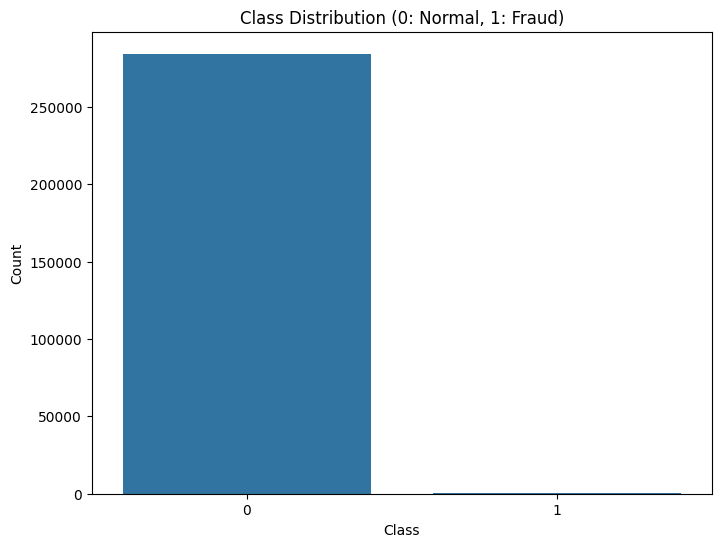

In [7]:
# Class distribution plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

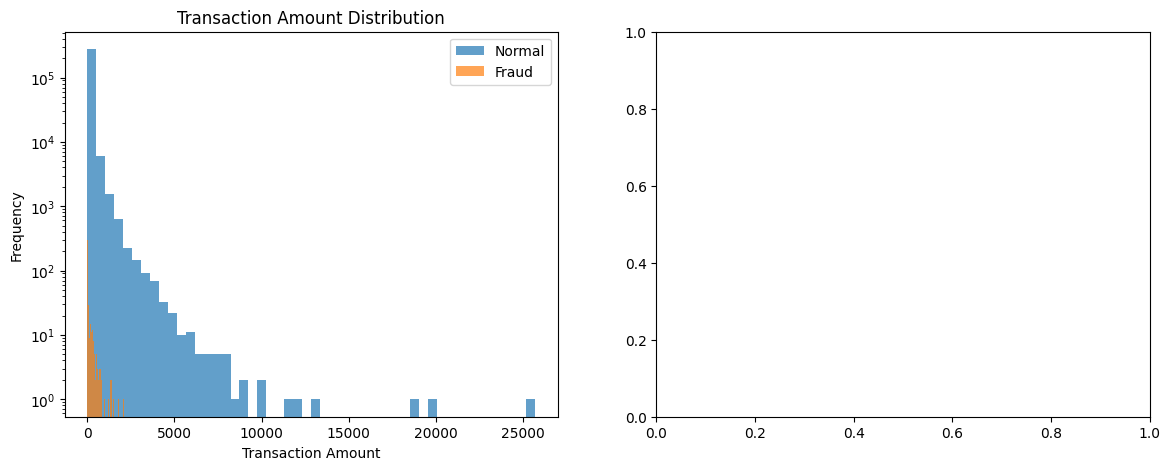

In [8]:

# Amount distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df[df['Class']==0]['Amount'], bins=50, alpha=0.7, label='Normal')
axes[0].hist(df[df['Class']==1]['Amount'], bins=50, alpha=0.7, label='Fraud')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Transaction Amount Distribution')
axes[0].legend()
axes[0].set_yscale('log')

In [9]:

# Time distribution
axes[1].hist(df[df['Class']==0]['Time'], bins=50, alpha=0.7, label='Normal')
axes[1].hist(df[df['Class']==1]['Time'], bins=50, alpha=0.7, label='Fraud')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Time Distribution')
axes[1].legend()

plt.tight_layout()
plt.savefig('amount_time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

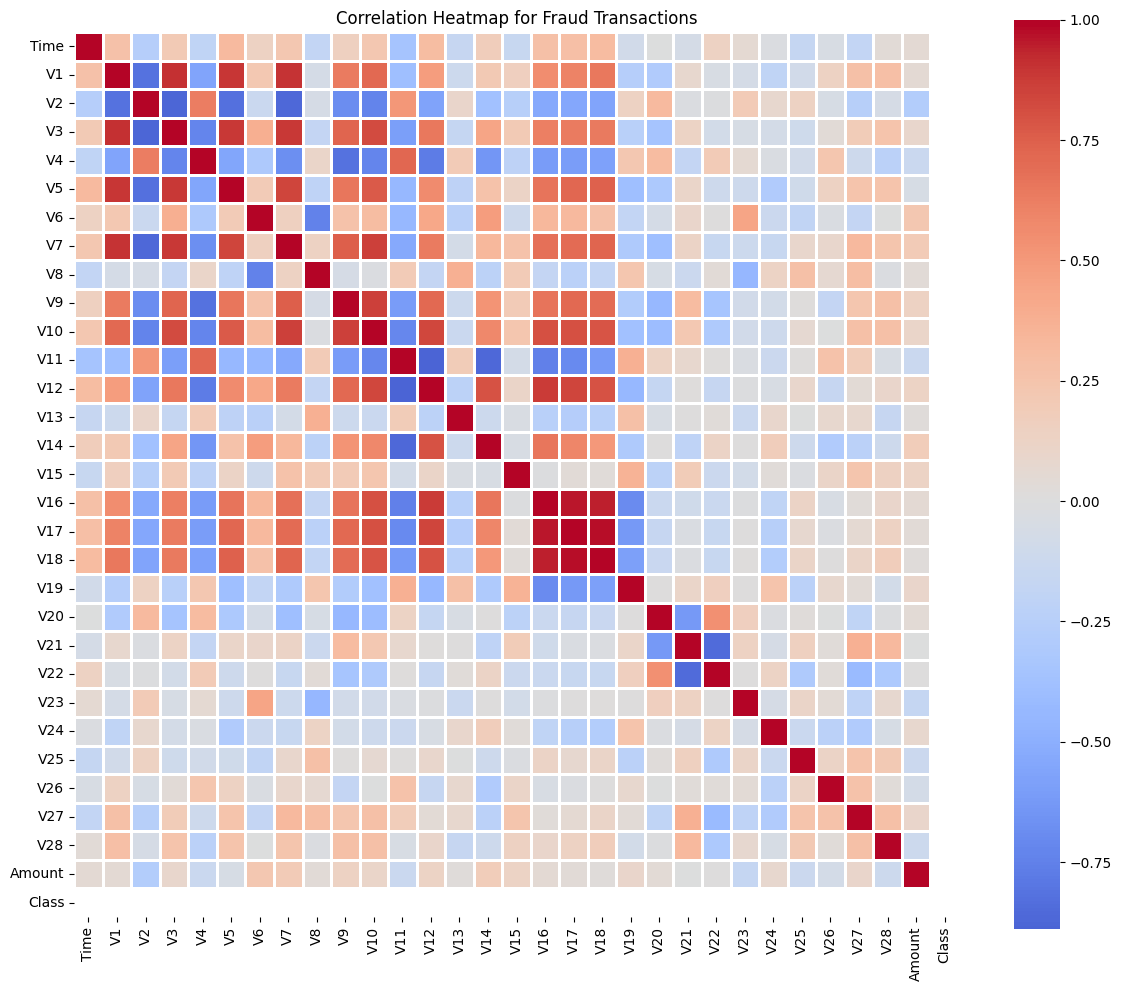

In [10]:
# Correlation heatmap for fraud cases
fraud_data = df[df['Class'] == 1]
plt.figure(figsize=(12, 10))
correlation = fraud_data.corr()
sns.heatmap(correlation, cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap for Fraud Transactions')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

DATA PREPROCESSING

In [11]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [12]:
# Normalize Time and Amount features
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (284807, 30)
Target shape: (284807,)


TRAIN-TEST SPLIT

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set fraud cases: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.2f}%)")
print(f"Test set fraud cases: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.2f}%)")



Training set size: 227845
Test set size: 56962

Training set fraud cases: 394 (0.17%)
Test set fraud cases: 98 (0.17%)


HANDLE CLASS IMBALANCE (Multiple Strategies)

In [14]:
# Combine train data
train_data = pd.concat([X_train, y_train], axis=1)

In [15]:
# Separate majority and minority classes
normal_transactions = train_data[train_data['Class'] == 0]
fraud_transactions = train_data[train_data['Class'] == 1]

In [16]:
# Undersample normal transactions
normal_undersampled = resample(normal_transactions,
                               replace=False,
                               n_samples=len(fraud_transactions) * 2,
                               random_state=42)

In [17]:
# Combine the undersampled data
balanced_data = pd.concat([normal_undersampled, fraud_transactions])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

X_train_balanced = balanced_data.drop('Class', axis=1)
y_train_balanced = balanced_data['Class']

print(f"Balanced training set size: {X_train_balanced.shape[0]}")
print(f"Balanced fraud cases: {y_train_balanced.sum()} ({y_train_balanced.sum()/len(y_train_balanced)*100:.2f}%)")


Balanced training set size: 1182
Balanced fraud cases: 394 (33.33%)


SAVE PREPROCESSED DATA

In [18]:
# Save as numpy arrays for easy loading
np.save('X_train.npy', X_train.values)
np.save('X_test.npy', X_test.values)
np.save('y_train.npy', y_train.values)
np.save('y_test.npy', y_test.values)

np.save('X_train_balanced.npy', X_train_balanced.values)
np.save('y_train_balanced.npy', y_train_balanced.values)

FEATURE IMPORTANCE ANALYSIS

In [19]:
# Calculate correlation with target
feature_correlation = df.corr()['Class'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Fraud:")
print(feature_correlation.head(11))  # 11 to exclude 'Class' itself

print("\nBottom 10 Features:")
print(feature_correlation.tail(10))


Top 10 Features Correlated with Fraud:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Bottom 10 Features:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


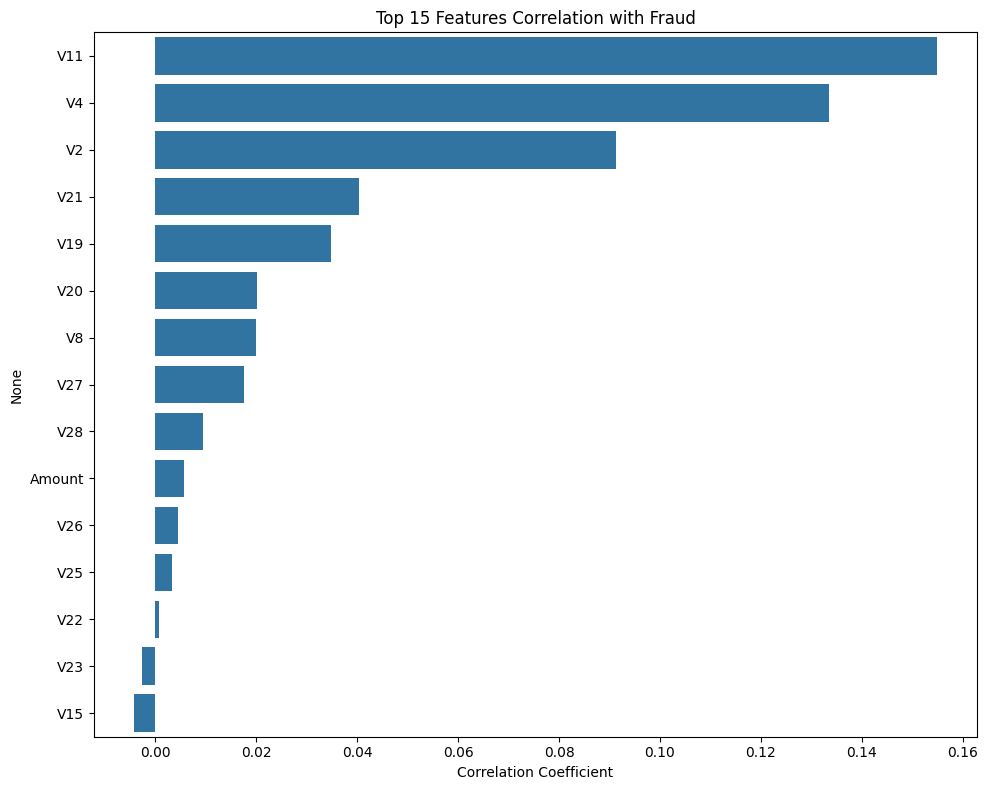

In [20]:
# Visualize top correlations
plt.figure(figsize=(10, 8))
top_features = feature_correlation.head(16).drop('Class')
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 15 Features Correlation with Fraud')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()